# **Computational Drug Discovery**

analiza danych pobranych z bazy [*ChEMBL*](https://www.ebi.ac.uk/chembl/) oraz stworzenie na ich podstawie modelu ML pozwalającego na przewidzenie, czy dany związek będzie wykazywać zdolności inhibitujące względem prekursora Alzheimera: ``Beta amyloid A4 protein``




In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
target = new_client.target
target_query = target.search('alzheimer')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,12.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Rattus norvegicus,Amyloid beta A4 protein,5.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
2,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,4.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Mus musculus,Amyloid-beta A4 protein,4.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090


In [5]:
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL2487'

- dla znalezionej substancji wyszukuje się substancje, które wykazują bioaktywność względem szukanego związku
- wybrano ``standard_type="IC50"``, aby ujednolicić wyniki

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,Not Active,23086562,[],CHEMBL4510291,Aβ40 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,1600.0
1268,Active,23087159,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510293,Aβ42 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,31.0
1269,Active,23087160,[],CHEMBL4510294,Aβ40 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,131.0
1270,Not Active,23087164,[],CHEMBL4510293,Aβ42 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,µM,None,None,10.0


# wstępna analiza danych
### usunięcie wierszy, gdzie nie ma podanych standard value lub smiles

In [7]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/tmp/ipykernel_8119/3852201246.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,Not Active,23086562,[],CHEMBL4510291,Aβ40 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,1600.0
1268,Active,23087159,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510293,Aβ42 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,31.0
1269,Active,23087160,[],CHEMBL4510294,Aβ40 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,131.0
1270,Not Active,23087164,[],CHEMBL4510293,Aβ42 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,µM,None,None,10.0


### usunięcie duplikatów

In [8]:
len(df2.canonical_smiles.unique())

961

In [9]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,None,22801733,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4711689,Inhibition of self-induced amyloid beta (1 to ...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,None,None,2.85
1264,Active,23086559,[],CHEMBL4510290,Aβ42 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,0.5
1267,Not Active,23086562,[],CHEMBL4510291,Aβ40 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,1600.0
1268,Active,23087159,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510293,Aβ42 inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,None,None,31.0


### wybranie potrzebnych informacji i złożenie z nich *dataframe*

In [10]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1263,CHEMBL4740154,C#CCN(C)CCCn1ccc(=O)c(O)c1C,2850.0
1264,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5
1267,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0
1268,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0


In [11]:
df3.to_csv('bioactivity_data_preprocessed.csv', index=False)

### podpisanie związków jako active, inactive lub intermediate
Bioaktywność jest podawana jako IC50. Związki o wartościach poniżej 1000 nM będą uznawane za ``active``, te o wartościach większych niż 10 000 nM - jako ``inactive``, a te pomiędzy jako - ``intermediate``

In [12]:
df4 = pd.read_csv('bioactivity_data_preprocessed.csv')

In [13]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [14]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
956,CHEMBL4740154,C#CCN(C)CCCn1ccc(=O)c(O)c1C,2850.0,intermediate
957,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active
958,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate
959,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active


### zamiana IC50 na pIC50

dzięki wykorzystaniu ``pIC50`` dane będą rozłożone na mniejszym przedziale, co ułatwi ich wizualizację
pIC50 to **-log10(IC50)**

In [34]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

standard value, które nie mieszczą się w przedziale od 0 do 100,000,000 należy znormalizować, aby dało się policzyć dla nich pIC50, standard value poniżej 0 nie mają sensu fizycznego, należy je usunąć

In [16]:
df5.standard_value.describe()

count       961.000000
mean      20565.149532
std       57347.391826
min          -1.000000
25%         138.000000
50%        3700.000000
75%       17000.000000
max      800000.000000
Name: standard_value, dtype: float64

In [25]:
df5=df5[df5['standard_value'] > 0]
df5

,molecule_chembl_id,canonical_smiles,standard_value,class,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,10000.0
...,...,...,...,...,...
956,CHEMBL4740154,C#CCN(C)CCCn1ccc(=O)c(O)c1C,2850.0,intermediate,2850.0
957,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active,0.5
958,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate,1600.0
959,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active,31.0


In [32]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)
          
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

In [33]:
df_norm = norm_value(df5)
df_norm

,molecule_chembl_id,canonical_smiles,class,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0
...,...,...,...,...
956,CHEMBL4740154,C#CCN(C)CCCn1ccc(=O)c(O)c1C,intermediate,2850.0
957,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,0.5
958,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,intermediate,1600.0
959,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,31.0


In [27]:
df_norm.standard_value_norm.describe()

count       960.000000
mean      20586.572604
std       57373.436066
min           0.300000
25%         139.500000
50%        3705.000000
75%       17057.500000
max      800000.000000
Name: standard_value_norm, dtype: float64

In [35]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,5.000000
...,...,...,...,...
956,CHEMBL4740154,C#CCN(C)CCCn1ccc(=O)c(O)c1C,intermediate,5.545155
957,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,9.301030
958,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,intermediate,5.795880
959,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,7.508638


In [36]:
df_final.pIC50.describe()

count    960.000000
mean       5.793163
std        1.332268
min        3.096910
25%        4.768092
50%        5.431212
75%        6.855434
max        9.522879
Name: pIC50, dtype: float64

In [30]:
df_final.to_csv('bioactivity_data_curated.csv', index=False)

### Obliczanie ``molecular descriptors``, które służą do ilościowego opisu danych w bazie.

używane będą descryptory [PaDEL](https://onlinelibrary.wiley.com/doi/10.1002/jcc.21707)*, istnieje publicznie dostęna implementacja w języku java, została ona pobrana z repozytorium Dataprofessor, jakolwiek oficjanie software jest dostępny pod [adresem](http://www.yapcwsoft.com/dd/padeldescriptor/)  

**Yap CW. PaDEL-descriptor: an open source software to calculate molecular descriptors and fingerprints. J Comput Chem. 2011 May;32(7):1466-74. doi: 10.1002/jcc.21707. Epub 2010 Dec 17. PMID: 21425294.*


In [31]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-06-11 17:40:14--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-06-11 17:40:14--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  2.30MB/s    in 11s     

2022-06-11 17:40:26 (2.18 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-06-11 17:40:27--  https://githu

In [37]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [39]:
df6 = pd.read_csv('bioactivity_data_curated.csv')
df6

,molecule_chembl_id,canonical_smiles,class,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,5.000000
...,...,...,...,...
955,CHEMBL4740154,C#CCN(C)CCCn1ccc(=O)c(O)c1C,intermediate,5.545155
956,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,9.301030
957,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,intermediate,5.795880
958,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,7.508638


In [40]:
selection = ['canonical_smiles','molecule_chembl_id']
df6_selection = df6[selection]
df6_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [41]:
! cat molecule.smi | head -5

CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1	CHEMBL311039
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1	CHEMBL450926
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1	CHEMBL310242
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1	CHEMBL74874
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1	CHEMBL75183
cat: write error: Broken pipe


In [42]:
! cat molecule.smi | wc -l

960


In [43]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [44]:
! bash padel.sh

Processing CHEMBL311039 in molecule.smi (1/960). 
Processing CHEMBL450926 in molecule.smi (2/960). 
Processing CHEMBL310242 in molecule.smi (3/960). 
Processing CHEMBL74874 in molecule.smi (4/960). 
Processing CHEMBL75183 in molecule.smi (5/960). 
Processing CHEMBL563 in molecule.smi (6/960). 
Processing CHEMBL196279 in molecule.smi (7/960). 
Processing CHEMBL195970 in molecule.smi (8/960). 
Processing CHEMBL264006 in molecule.smi (9/960). 
Processing CHEMBL193971 in molecule.smi (10/960). 
Processing CHEMBL194274 in molecule.smi (11/960). 
Processing CHEMBL196321 in molecule.smi (12/960). 
Processing CHEMBL196322 in molecule.smi (13/960). 
Processing CHEMBL197202 in molecule.smi (15/960). 
Processing CHEMBL380778 in molecule.smi (14/960). 
Processing CHEMBL196246 in molecule.smi (16/960). 
Processing CHEMBL196946 in molecule.smi (18/960). Average speed: 2.25 s/mol.
Processing CHEMBL196945 in molecule.smi (17/960). Average speed: 2.24 s/mol.
Processing CHEMBL372751 in molecule.smi (19/

### przygotowanie macierzy X i Y dla modelu ML

In [45]:
df6_X = pd.read_csv('descriptors_output.csv').drop(columns=['Name'])
df6_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
956,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
957,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
958,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df6_Y = df6['pIC50']
df6_Y

0      5.301030
1      5.568636
2      5.744727
3      4.958607
4      5.000000
         ...   
955    5.545155
956    9.301030
957    5.795880
958    7.508638
959    8.000000
Name: pIC50, Length: 960, dtype: float64

In [62]:
dataset = pd.concat([df6_X,df6_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.545155
956,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.301030
957,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
958,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638


In [63]:
dataset.to_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

### budowanie modelu regresji używając Random Forest Regressor

In [73]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
#input
X = dataset.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
956,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
957,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
958,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [160]:
#output
Y = dataset.pIC50
Y

0      5.301030
1      5.568636
2      5.744727
3      4.958607
4      5.000000
         ...   
955    5.545155
956    9.301030
957    5.795880
958    7.508638
959    8.000000
Name: pIC50, Length: 960, dtype: float64

### usunięcie kolumn o niskiej wariancji

In [161]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X,threshold=0.1)
X



,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1,1,1,0,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
956,1,0,1,1,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
957,1,1,1,1,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
958,1,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [162]:
X.to_csv('descriptor_list.csv', index = False)

### podział danych na treningowe i testowe

In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [164]:
X_train.shape, Y_train.shape

((768, 258), (768,))

In [165]:
X_test.shape, Y_test.shape

((192, 258), (192,))

In [166]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6574051671899898

In [167]:
Y_pred = model.predict(X_test)

In [172]:
print('Mean squared error (MSE): %.2f'
      %mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      %r2_score(Y_test, Y_pred))

Mean squared error (MSE): 0.58
Coefficient of determination (R^2): 0.66


<function matplotlib.pyplot.show(close=None, block=None)>

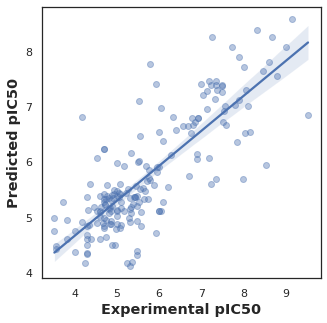

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)
plt.show

### zapisanie modelu jako obiektu Pickle

In [170]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))